Dataset Link: [Click here for Covid-19 Global Dataset](https://www.kaggle.com/datasets/josephassaker/covid19-global-dataset)

## Step 1: Importing Required Libraries and Loading Dataset

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
covid_data = pd.read_csv('worldometer_coronavirus_daily_data.csv')

# Display the first few rows to understand the structure of the dataset
covid_data.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


### Data Preparation

In [121]:
# Checking for missing values in the dataset
print("Missing values before preprocessing:")
print(covid_data.isnull().sum())

# Preprocessing steps for handling missing values

# 1. For columns where missing values can be filled with zero (like daily new cases and deaths)
covid_data['daily_new_cases'] = covid_data['daily_new_cases'].fillna(0)
covid_data['daily_new_deaths'] = covid_data['daily_new_deaths'].fillna(0)

# 2. For columns where missing values might be better filled with the mean (e.g., active cases)
covid_data['active_cases'] = covid_data['active_cases'].fillna(covid_data['active_cases'].mean())

# 3. Dropping rows with missing values in critical columns if necessary (e.g., date and country)
covid_data = covid_data.dropna(subset=['date', 'country'])

# Checking for any remaining missing values after preprocessing
print("\nMissing values after preprocessing:")
print(covid_data.isnull().sum())

# Convert the 'date' column to datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'], errors='coerce')

# Extract the year from the date
covid_data['year'] = covid_data['date'].dt.year



Missing values before preprocessing:
date                           0
country                        0
cumulative_total_cases         0
daily_new_cases            10458
active_cases               18040
cumulative_total_deaths     6560
daily_new_deaths           26937
dtype: int64

Missing values after preprocessing:
date                          0
country                       0
cumulative_total_cases        0
daily_new_cases               0
active_cases                  0
cumulative_total_deaths    6560
daily_new_deaths              0
dtype: int64


## Step 2: Defining Functions for Creating Plots

<ipython-input-122-37f976684500>:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = data.resample('Q').max()


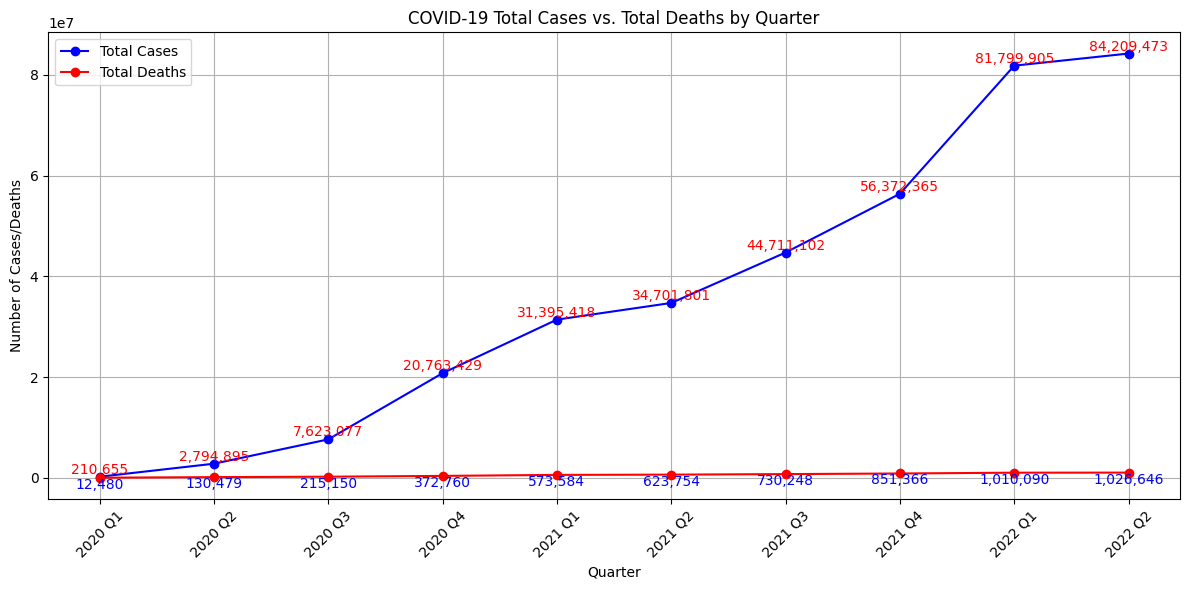

In [122]:
# Line Graph (Relational Graph Function):
def plot_cases_vs_deaths_by_quarter(data):
    """
    Plots a multiple line chart showing the number of cases versus number of deaths by quarter for each year,
    with each point annotated with its value.

    Args:
    - data (DataFrame): The COVID-19 dataset with 'date', 'cumulative_total_cases', and 'cumulative_total_deaths' columns.
    """
    # Convert the 'date' column to datetime format
    data['date'] = pd.to_datetime(data['date'])

    # Set the date as the index
    data.set_index('date', inplace=True)

    # Resample data by quarter and calculate the maximum cumulative cases and deaths for each quarter
    quarterly_data = data.resample('Q').max()

    # Reset index to access the date column
    quarterly_data.reset_index(inplace=True)

    # Extract year and quarter information for labeling
    quarterly_data['year'] = quarterly_data['date'].dt.year
    quarterly_data['quarter'] = quarterly_data['date'].dt.quarter
    quarterly_data['year_quarter'] = quarterly_data['year'].astype(str) + ' Q' + quarterly_data['quarter'].astype(str)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot cases and deaths as separate lines
    plt.plot(quarterly_data['year_quarter'], quarterly_data['cumulative_total_cases'], marker='o', color='blue', label='Total Cases')
    plt.plot(quarterly_data['year_quarter'], quarterly_data['cumulative_total_deaths'], marker='o', color='red', label='Total Deaths')

    # Add labels and title
    plt.title("COVID-19 Total Cases vs. Total Deaths by Quarter")
    plt.xlabel("Quarter")
    plt.ylabel("Number of Cases/Deaths")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Annotate each point with its value
    for i, (cases, deaths) in enumerate(zip(quarterly_data['cumulative_total_cases'], quarterly_data['cumulative_total_deaths'])):
        plt.text(i, cases, f"{int(cases):,}", ha='center', va='bottom', color='red', fontsize=10)
        plt.text(i, deaths, f"{int(deaths):,}", ha='center', va='top', color='blue', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function
plot_cases_vs_deaths_by_quarter(covid_data)


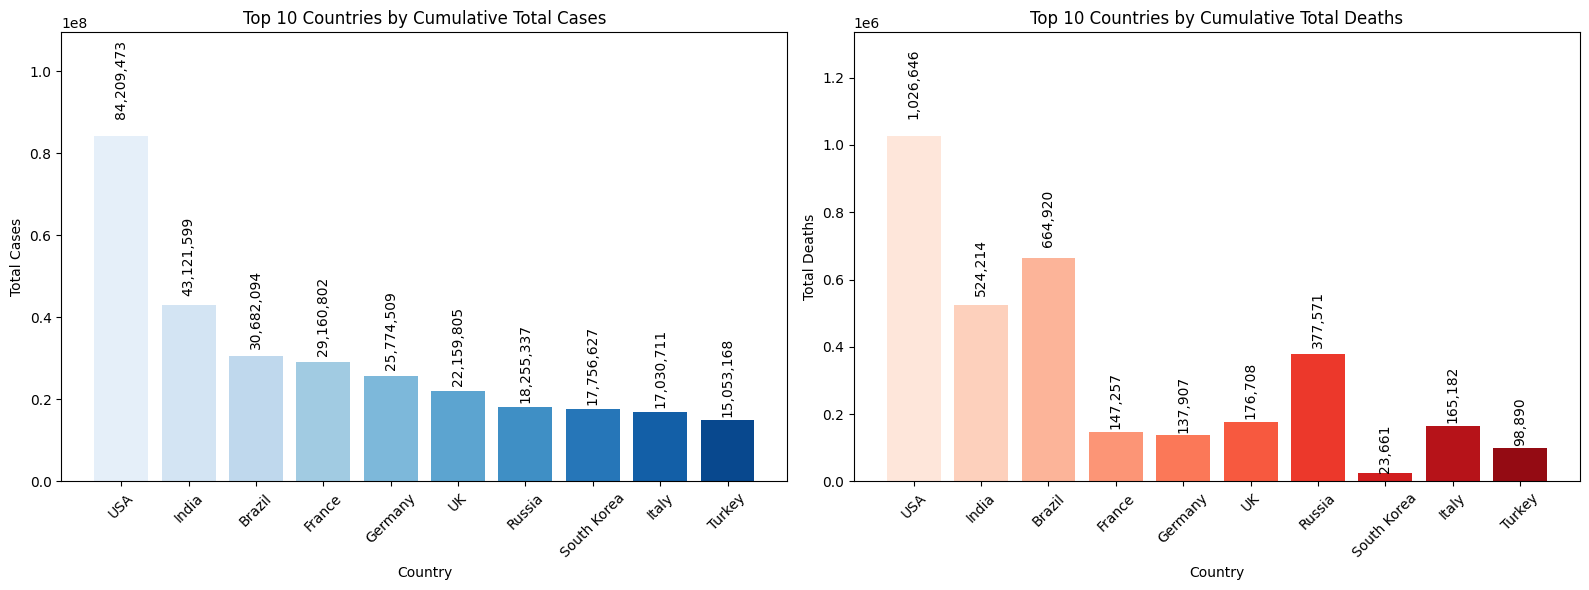

In [123]:
# Categorical Graph Function: Bar Charts of Total Cases and Deaths by Country (Top 10)
def plot_top_countries_cases_and_deaths(data):
    """
    Plots two bar charts side by side as subplots:
    - The top 10 countries with the highest cumulative total cases.
    - The top 10 countries with the highest cumulative total deaths.

    Args:
    - data (DataFrame): The COVID-19 dataset.
    """
    # Calculate the top 10 countries by cumulative total cases
    top_countries_cases = data.groupby("country")["cumulative_total_cases"].max().nlargest(10)

    # Calculate cumulative deaths for these top countries
    top_countries_deaths = data[data["country"].isin(top_countries_cases.index)].groupby("country")["cumulative_total_deaths"].max()
    top_countries_deaths = top_countries_deaths.loc[top_countries_cases.index]  # Align with cases order

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot total cases
    colors_cases = sns.color_palette("Blues", n_colors=10)
    axes[0].bar(top_countries_cases.index, top_countries_cases.values, color=colors_cases)
    axes[0].set_title("Top 10 Countries by Cumulative Total Cases")
    axes[0].set_xlabel("Country")
    axes[0].set_ylabel("Total Cases")
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].set_ylim(0, top_countries_cases.max() * 1.3)  # Increase y-axis limit by 30%

    # Annotating each bar with the total cases value
    for index, value in enumerate(top_countries_cases):
        axes[0].text(index, value + 0.05 * value, f"{int(value):,}", ha='center', va='bottom', rotation=90)

    # Plot total deaths
    colors_deaths = sns.color_palette("Reds", n_colors=10)
    axes[1].bar(top_countries_deaths.index, top_countries_deaths.values, color=colors_deaths)
    axes[1].set_title("Top 10 Countries by Cumulative Total Deaths")
    axes[1].set_xlabel("Country")
    axes[1].set_ylabel("Total Deaths")
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_ylim(0, top_countries_deaths.max() * 1.3)  # Increase y-axis limit by 30%

    # Annotating each bar with the total deaths value
    for index, value in enumerate(top_countries_deaths):
        axes[1].text(index, value + 0.05 * value, f"{int(value):,}", ha='center', va='bottom', rotation=90)

    # Adjust layout for clarity
    plt.tight_layout()
    plt.show()

# Call the function
plot_top_countries_cases_and_deaths(covid_data)

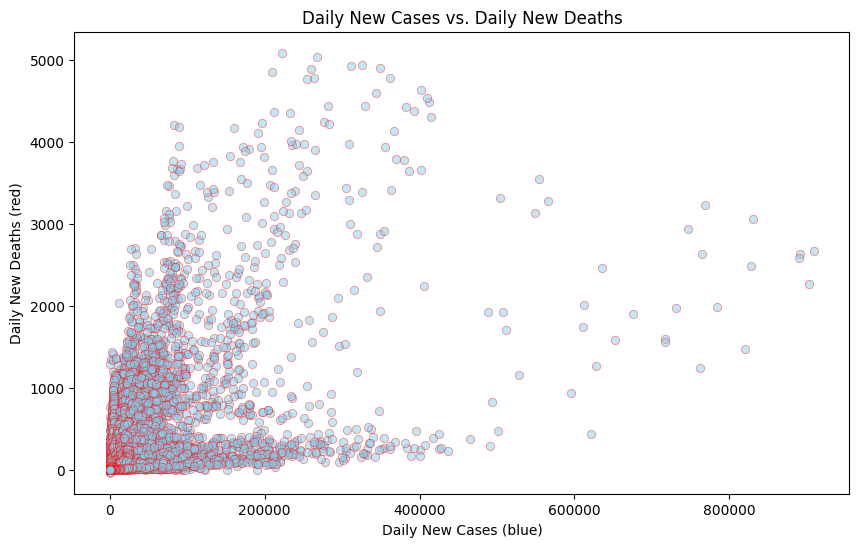

In [128]:
# Relational Graph Function:
# Scatter Plot of Daily New Cases vs. Daily New Deaths
def plot_daily_cases_vs_deaths(data):
    """
    Plots a scatter plot showing the relationship between daily new cases and daily new deaths.

    Args:
    - data (DataFrame): The COVID-19 dataset containing daily new cases and deaths.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x="daily_new_cases", y="daily_new_deaths", color="skyblue", edgecolor="red", alpha=0.5)
    plt.title("Daily New Cases vs. Daily New Deaths")
    plt.xlabel("Daily New Cases")
    plt.ylabel("Daily New Deaths")
    plt.show()

# Call the function
plot_daily_cases_vs_deaths(covid_data)



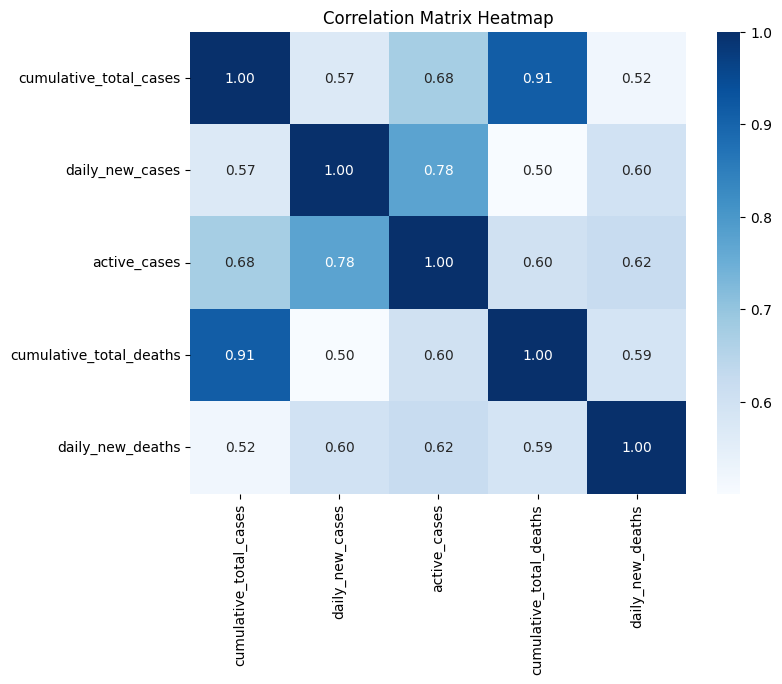

In [125]:
# Statistical Graph Function: Heatmap of Correlation Matrix

def plot_correlation_heatmap(data):
    """
    Plots a heatmap of the correlation matrix for numerical columns in the dataset.

    Args:
    - data (DataFrame): The COVID-19 dataset.
    """
    correlation_matrix = data[["cumulative_total_cases", "daily_new_cases", "active_cases", "cumulative_total_deaths", "daily_new_deaths"]].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# Call the function
plot_correlation_heatmap(covid_data)


In [126]:
#  Statistical Analysis
def describe_statistics(data):
    """
    Prints statistical descriptions for major moments and generates the correlation matrix.

    Args:
    - data (DataFrame): The COVID-19 dataset.
    """
    # Dataset Information
    print('Dataset Information')
    print(covid_data.info())

    # Dataset Shape
    print("\nDataset Shape:")
    print(covid_data.shape)

    # Descriptive statistics
    description = data[["cumulative_total_cases", "daily_new_cases", "active_cases", "cumulative_total_deaths", "daily_new_deaths"]].describe()
    print("Descriptive Statistics:\n")
    display(description)
    # Skewness and Kurtosis
    skewness = data[["cumulative_total_cases", "daily_new_cases", "active_cases", "cumulative_total_deaths", "daily_new_deaths"]].skew()
    kurtosis = data[["cumulative_total_cases", "daily_new_cases", "active_cases", "cumulative_total_deaths", "daily_new_deaths"]].kurt()

    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis)

    correlation_matrix = data[["cumulative_total_cases", "daily_new_cases", "active_cases", "cumulative_total_deaths", "daily_new_deaths"]].corr()
    print("\nCorrelation Matrix:\n")
    display(correlation_matrix)

# Call the function
describe_statistics(covid_data)

Dataset Information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184787 entries, 2020-02-15 to 2022-05-14
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  184787 non-null  object 
 1   cumulative_total_cases   184787 non-null  float64
 2   daily_new_cases          184787 non-null  float64
 3   active_cases             184787 non-null  float64
 4   cumulative_total_deaths  178227 non-null  float64
 5   daily_new_deaths         184787 non-null  float64
 6   year                     184787 non-null  int32  
dtypes: float64(5), int32(1), object(1)
memory usage: 10.6+ MB
None

Dataset Shape:
(184787, 7)
Descriptive Statistics:



,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,1.847870e+05,184787.000000,1.847870e+05,1.782270e+05,184787.000000
mean,7.251089e+05,2818.548507,6.239283e+04,1.388600e+04,34.025418
std,3.681471e+06,17305.881476,3.757596e+05,6.049521e+04,167.972177
min,0.000000e+00,-322.000000,-1.432100e+04,0.000000e+00,-39.000000
25%,1.099000e+03,0.000000,9.100000e+01,2.400000e+01,0.000000
50%,1.775600e+04,41.000000,2.352000e+03,3.040000e+02,0.000000
75%,2.238085e+05,636.000000,3.325200e+04,4.111000e+03,8.000000
max,8.420947e+07,909610.000000,1.793543e+07,1.026646e+06,5093.000000



Skewness:
 cumulative_total_cases     12.151336
daily_new_cases            20.056181
active_cases               22.228657
cumulative_total_deaths     9.003142
daily_new_deaths           12.461121
dtype: float64

Kurtosis:
 cumulative_total_cases     196.136713
daily_new_cases            636.560544
active_cases               756.486057
cumulative_total_deaths    101.176468
daily_new_deaths           222.313688
dtype: float64

Correlation Matrix:



,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
cumulative_total_cases,1.000000,0.569590,0.675978,0.913416,0.519916
daily_new_cases,0.569590,1.000000,0.775291,0.500446,0.597538
active_cases,0.675978,0.775291,1.000000,0.600100,0.619658
cumulative_total_deaths,0.913416,0.500446,0.600100,1.000000,0.588712
daily_new_deaths,0.519916,0.597538,0.619658,0.588712,1.000000


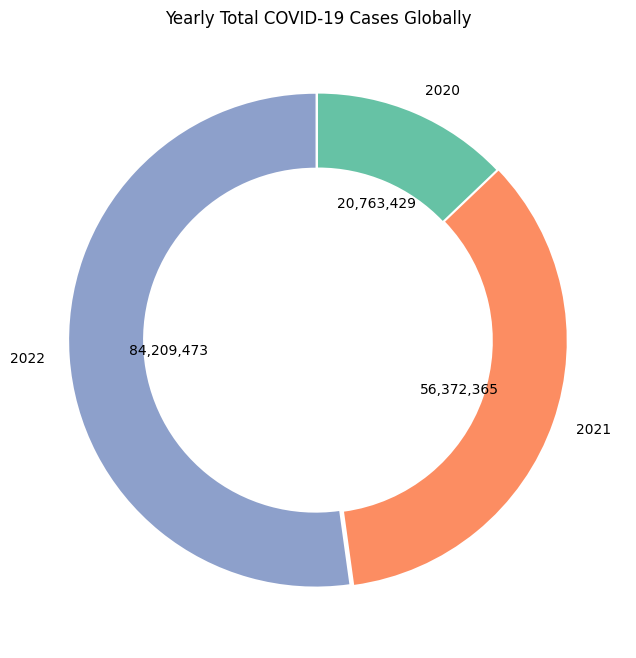

In [127]:
# Categorical Graph Function: Donut Chart of Total Cases by Year
def plot_yearly_total_cases_donut(data):
    """
    Plots the total cumulative cases per year globally as a donut chart,
    with each section annotated with its total cases value.

    Args:
    - data (DataFrame): The COVID-19 dataset with a 'year' column.
    """
    # Calculate the total cases per year
    yearly_cases = data.groupby('year')['cumulative_total_cases'].max()

    # Plotting
    plt.figure(figsize=(8, 8))
    colors = plt.cm.Set2(range(len(yearly_cases)))  # Use a color map for varied colors

    # Creating the donut chart
    wedges, texts, autotexts = plt.pie(
        yearly_cases,
        labels=yearly_cases.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops=dict(width=0.3),  # Creates the donut effect
        colors=colors,
        explode=(0,0.01,0.01)
    )

    # Annotate each section with the absolute values
    for i, autotext in enumerate(autotexts):
        autotext.set_text(f"{int(yearly_cases.iloc[i]):,}")  # Show the total cases in each segment

    plt.title("Yearly Total COVID-19 Cases Globally")
    plt.show()

# Call the function
plot_yearly_total_cases_donut(covid_data)